# Importing Libraries

In [33]:
import numpy as np
import pandas as pd 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetching Data and PreProcessing

In [34]:
#Distinct dataset for training and testing
prices_dataset_train =  pd.read_csv('SP500_train.csv')
prices_dataset_train.shape

(1258, 7)

In [35]:
prices_dataset_test =  pd.read_csv('SP500_test.csv')
prices_dataset_test.shape

(20, 7)

In [36]:
prices_dataset_train.head()

,date,open,high,low,close,adj_close,volume
0,03-01-2012,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,04-01-2012,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,05-01-2012,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,06-01-2012,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,09-01-2012,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [37]:
prices_dataset_test.head()

,date,open,high,low,close,adj_close,volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [38]:
trainingset = prices_dataset_train.iloc[:,5:6].values
trainingset

array([[1277.060059],
       [1277.300049],
       [1281.060059],
       ...,
       [2249.919922],
       [2249.26001 ],
       [2238.830078]])

In [39]:
testset = prices_dataset_test.iloc[:,5:6].values
testset

array([[2257.830078],
       [2270.75    ],
       [2269.      ],
       [2276.97998 ],
       [2268.899902],
       [2268.899902],
       [2275.320068],
       [2270.439941],
       [2274.639893],
       [2267.889893],
       [2271.889893],
       [2263.689941],
       [2271.310059],
       [2265.199951],
       [2280.070068],
       [2298.370117],
       [2296.679932],
       [2294.689941],
       [2280.899902],
       [2278.870117]])

In [40]:
#Min-max normalization
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(trainingset)

In [41]:
#Creating the training dataset
X_train = []
y_train = []
for i in range(40,1258):
    X_train.append(scaled_trainingset[i-40:i,0])  #Timestamp=40
    y_train.append(scaled_trainingset[i,0])

In [42]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [43]:
#Final Training Dataset(array)

In [44]:
X_train.shape,y_train.shape

((1218, 40, 1), (1218,))

In [45]:
X_train

array([[[0.00000000e+00],
        [2.41278448e-04],
        [4.02147503e-03],
        ...,
        [9.10159401e-02],
        [9.56306712e-02],
        [8.90957743e-02]],

       [[2.41278448e-04],
        [4.02147503e-03],
        [7.54026568e-04],
        ...,
        [9.56306712e-02],
        [8.90957743e-02],
        [9.75508371e-02]],

       [[4.02147503e-03],
        [7.54026568e-04],
        [3.65943370e-03],
        ...,
        [8.90957743e-02],
        [9.75508371e-02],
        [9.30669316e-02]],

       ...,

       [[8.53648401e-01],
        [8.39140999e-01],
        [8.25286987e-01],
        ...,
        [9.89182222e-01],
        [9.92027494e-01],
        [9.97144664e-01]],

       [[8.39140999e-01],
        [8.25286987e-01],
        [8.15957136e-01],
        ...,
        [9.92027494e-01],
        [9.97144664e-01],
        [9.78082912e-01]],

       [[8.25286987e-01],
        [8.15957136e-01],
        [8.12458473e-01],
        ...,
        [9.97144664e-01],
        [9.7808

In [46]:
y_train

array([0.09755084, 0.09306693, 0.08773843, ..., 0.97808291, 0.97741946,
       0.96693353])

# Building the LSTM Model

In [47]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 7s 40ms/step - loss: 0.0639
Epoch 2/100
39/39 [==============================] - 2s 40ms/step - loss: 0.0088
Epoch 3/100
39/39 [==============================] - 2s 43ms/step - loss: 0.0098
Epoch 4/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0074
Epoch 5/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0062
Epoch 6/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0064
Epoch 7/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0058
Epoch 8/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0059
Epoch 9/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0055
Epoch 10/100
39/39 [==============================] - 2s 40ms/step - loss: 0.0055
Epoch 11/100
39/39 [==============================] - 2s 39ms/step - loss: 0.0061
Epoch 12/100
39/39 [==============================] - 2s 40ms/step - loss: 0.0058
Epoch 13/100
39/39 [=====

# Model Testing

In [52]:
#Training set plus Testset

In [53]:
dataset_total = pd.concat((prices_dataset_train['adj_close'],prices_dataset_test['adj_close']), axis=0) 

In [54]:
dataset_total.shape

(1278,)

In [55]:
#All inputs for test set
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-40:].values    #last 60 values from row no 1218 to last
inputs

array([2088.659912, 2085.179932, 2131.52002 , 2139.560059, 2163.26001 ,
       2167.47998 , 2164.449951, 2164.199951, 2180.389893, 2176.939941,
       2187.120117, 2181.899902, 2198.179932, 2202.939941, 2204.719971,
       2213.350098, 2201.719971, 2204.659912, 2198.810059, 2191.080078,
       2191.949951, 2204.709961, 2212.22998 , 2241.350098, 2246.189941,
       2259.530029, 2256.959961, 2271.719971, 2253.280029, 2262.030029,
       2258.070068, 2262.530029, 2270.76001 , 2265.179932, 2260.959961,
       2263.790039, 2268.879883, 2249.919922, 2249.26001 , 2238.830078,
       2257.830078, 2270.75    , 2269.      , 2276.97998 , 2268.899902,
       2268.899902, 2275.320068, 2270.439941, 2274.639893, 2267.889893,
       2271.889893, 2263.689941, 2271.310059, 2265.199951, 2280.070068,
       2298.370117, 2296.679932, 2294.689941, 2280.899902, 2278.870117])

In [56]:
inputs = inputs.reshape(-1,1)
inputs.shape

(60, 1)

In [57]:
inputs = min_max_scaler.transform(inputs)      

In [58]:
X_test = []
for i in range(40,len(prices_dataset_test)+40):
    X_test.append(inputs[i-40:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [59]:
predictions = model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)
predictions

1/1 [==============================] - 1s 1s/step


array([[2238.716 ],
       [2235.845 ],
       [2236.1536],
       [2239.1597],
       [2244.3992],
       [2249.443 ],
       [2252.9788],
       [2255.244 ],
       [2255.8547],
       [2255.636 ],
       [2254.4216],
       [2253.137 ],
       [2251.3984],
       [2250.3408],
       [2249.5637],
       [2250.588 ],
       [2255.0447],
       [2261.5662],
       [2268.0781],
       [2271.6177]], dtype=float32)

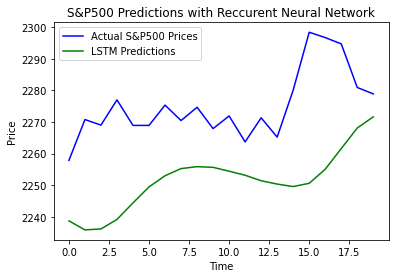

In [60]:
plt.plot(testset, color='blue', label='Actual S&P500 Prices')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('S&P500 Predictions with Reccurent Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()